In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

# Loading Dataaset

In [2]:
# Loading Dataset
df_Fall_2022 = pd.read_excel('Data set.xlsx', sheet_name = 'Fall 2022')
print(df_Fall_2022)

          Term   ID Gender  Age Minority Students
0    Fall 2022    1      F   21                No
1    Fall 2022    2      F   22                No
2    Fall 2022    3      F   24               Yes
3    Fall 2022    4      F   26               Yes
4    Fall 2022    5      M   22                No
..         ...  ...    ...  ...               ...
197  Fall 2022  196      F   36               Yes
198  Fall 2022  197      M   18                No
199  Fall 2022  198      F   34               Yes
200  Fall 2022  199      M   36                No
201  Fall 2022  200      F   58               Yes

[202 rows x 5 columns]


# Data Cleaning and Preprocessing:

    -- Handle duplicates in the datasets.
    
    -- Address null values.
    
    -- Format inconsistencies in categorical data (e.g., stripping whitespace).


In [3]:
# Summary of the Dataset 
df_Fall_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Term               202 non-null    object
 1   ID                 202 non-null    int64 
 2   Gender             202 non-null    object
 3   Age                202 non-null    int64 
 4   Minority Students  202 non-null    object
dtypes: int64(2), object(3)
memory usage: 8.0+ KB


In [4]:
# Summary for numerical columns
df_Fall_2022.describe()

,ID,Age
count,202.000000,202.000000
mean,100.945545,27.896040
std,57.865877,8.410139
min,1.000000,18.000000
25%,51.250000,22.000000
50%,101.500000,25.000000
75%,150.750000,32.000000
max,200.000000,58.000000


In [5]:
# Check for duplicates
print(df_Fall_2022.duplicated().sum())


2


In [6]:
# Check for duplicates
duplicate_rows = df_Fall_2022[df_Fall_2022.duplicated()]
print(duplicate_rows)

          Term   ID Gender  Age Minority Students
111  Fall 2022  111      M   25               Yes
181  Fall 2022  180      M   27                No


In [7]:
# Drop the duplicates
df_Fall_2022 = df_Fall_2022.drop_duplicates()

In [8]:
print(df_Fall_2022.duplicated().sum())


0


In [9]:
# Summary for non numerical columns
df_Fall_2022['Minority Students'].value_counts()

No     106
Yes     94
Name: Minority Students, dtype: int64

In [10]:
# Summary for non numerical columns
df_Fall_2022['Gender'].value_counts()

F    117
M     83
Name: Gender, dtype: int64

In [11]:
df_Fall_2022.head(10)

,Term,ID,Gender,Age,Minority Students
0,Fall 2022,1,F,21,No
1,Fall 2022,2,F,22,No
2,Fall 2022,3,F,24,Yes
3,Fall 2022,4,F,26,Yes
4,Fall 2022,5,M,22,No
5,Fall 2022,6,M,26,No
6,Fall 2022,7,F,32,No
7,Fall 2022,8,F,35,Yes
8,Fall 2022,9,F,21,Yes
9,Fall 2022,10,M,22,No


In [12]:
print(df_Fall_2022.shape)

(200, 5)


In [13]:
# check null values
df_Fall_2022.isna().sum()

Term                 0
ID                   0
Gender               0
Age                  0
Minority Students    0
dtype: int64

# Loading Dataset

In [14]:
# Loading Dataset
df_Advising_status = pd.read_excel('Data set.xlsx', sheet_name = 'Advising status')
print(df_Advising_status)

          Term   ID Received advising
0    Fall 2022    1               Yes
1    Fall 2022    2                No
2    Fall 2022    3               Yes
3    Fall 2022    4               Yes
4    Fall 2022    5                No
..         ...  ...               ...
195  Fall 2022  196               Yes
196  Fall 2022  197                No
197  Fall 2022  198                No
198  Fall 2022  199                No
199  Fall 2022  200               Yes

[200 rows x 3 columns]


In [15]:
df_Advising_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Term               200 non-null    object
 1   ID                 200 non-null    int64 
 2   Received advising  200 non-null    object
dtypes: int64(1), object(2)
memory usage: 4.8+ KB


In [16]:
duplicate_rows_1 = df_Advising_status[df_Advising_status.duplicated()]
print(duplicate_rows_1)

Empty DataFrame
Columns: [Term, ID, Received advising]
Index: []


In [17]:
df_Advising_status.isna().sum()

Term                 0
ID                   0
Received advising    0
dtype: int64

In [18]:
print(df_Advising_status.shape)

(200, 3)


In [19]:
df_Advising_status.describe()

,ID
count,200.000000
mean,100.500000
std,57.879185
min,1.000000
25%,50.750000
50%,100.500000
75%,150.250000
max,200.000000


# Merging the Dataset

    -- Combine datasets (e.g., Fall 2022 and Advising Status) based on common keys (e.g., ID, Term) for comprehensive analysis.
    -- Analyze the effect of advising status on age and other factors.


In [20]:
merged_df = pd.merge(df_Fall_2022, df_Advising_status, on=['ID','Term'])

In [21]:
# df_Advising_status['ID'].value_counts()

In [22]:
merged_df.head(10)

,Term,ID,Gender,Age,Minority Students,Received advising
0,Fall 2022,1,F,21,No,Yes
1,Fall 2022,2,F,22,No,No
2,Fall 2022,3,F,24,Yes,Yes
3,Fall 2022,4,F,26,Yes,Yes
4,Fall 2022,5,M,22,No,No
5,Fall 2022,6,M,26,No,Yes
6,Fall 2022,7,F,32,No,No
7,Fall 2022,8,F,35,Yes,Yes
8,Fall 2022,9,F,21,Yes,No
9,Fall 2022,10,M,22,No,No


In [23]:
merged_df.to_excel("Fall_2022_merged.xlsx")

In [24]:
merged_df['Received advising'].value_counts()

No     104
Yes     96
Name: Received advising, dtype: int64

In [68]:
merged_df['Minority Students'].value_counts()

No     106
Yes     94
Name: Minority Students, dtype: int64

In [25]:
merged_df['Term'].value_counts()

Fall 2022    200
Name: Term, dtype: int64

In [26]:
merged_df.shape

(200, 6)

In [27]:
merged_df.isna().sum()

Term                 0
ID                   0
Gender               0
Age                  0
Minority Students    0
Received advising    0
dtype: int64

In [28]:
# Check for duplicates
print(merged_df.duplicated().sum())


0


# Dataset after merging 

In [29]:
merged_df

,Term,ID,Gender,Age,Minority Students,Received advising
0,Fall 2022,1,F,21,No,Yes
1,Fall 2022,2,F,22,No,No
2,Fall 2022,3,F,24,Yes,Yes
3,Fall 2022,4,F,26,Yes,Yes
4,Fall 2022,5,M,22,No,No
...,...,...,...,...,...,...
195,Fall 2022,196,F,36,Yes,Yes
196,Fall 2022,197,M,18,No,No
197,Fall 2022,198,F,34,Yes,No
198,Fall 2022,199,M,36,No,No


# Exploratory Data Analysis (EDA):

    -- Analyze numerical and categorical data using summaries, counts, and value distributions.
    -- Visualize data patterns and relationships (e.g., histograms, bar charts, heatmaps).


# Histogram of Gender Distribution

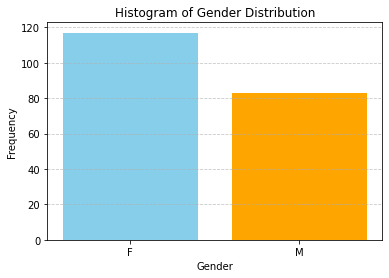

In [30]:
# Count the frequency of each gender
gender_counts = merged_df["Gender"].value_counts()

# Create the histogram
plt.bar(gender_counts.index, gender_counts.values, color=["skyblue", "orange"])
plt.title("Histogram of Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.xticks(ticks=range(len(gender_counts.index)), labels=gender_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Histogram of Ages

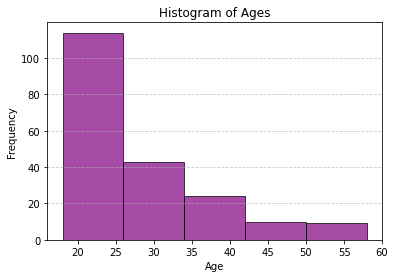

In [31]:
plt.hist(merged_df["Age"], bins=5, color="purple", alpha=0.7, edgecolor="black")
plt.title("Histogram of Ages")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Age Groups by Gender

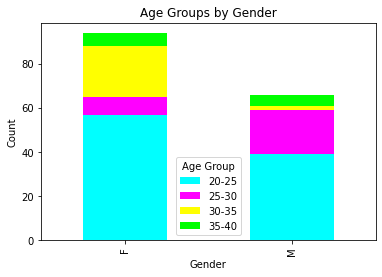

In [32]:
merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=[20, 25, 30, 35, 40], labels=["20-25", "25-30", "30-35", "35-40"])
age_group_counts = merged_df.groupby(['Gender', 'Age Group']).size().unstack()
age_group_counts.plot(kind='bar', stacked=True, color=["cyan", "magenta", "yellow", "lime"])
plt.title("Age Groups by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Age Group")
plt.show()

# Minority Status Distribution by Gender

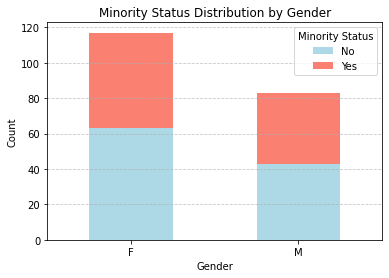

In [34]:
# Group data by Gender and Minority Status
minority_counts_gender = merged_df.groupby(['Gender', 'Minority Students']).size().unstack()

# Visualization
minority_counts_gender.plot(kind='bar', stacked=True, color=["lightblue", "salmon"])
plt.title("Minority Status Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Minority Status", labels=["No", "Yes"])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.show()

# Statistical Testing:

    -- Conduct T-tests to compare means (e.g., minority vs. non-minority students, advised vs. non-advised students).
    -- Perform Chi-Square tests to explore relationships between categorical variables (e.g., gender and minority status).


# T-Test (Minority vs Non-Minority Age Differences)


In [36]:
from scipy import stats


minority = merged_df[merged_df['Minority Students'] == 'Yes']['Age']
# print(minority)
non_minority = merged_df[merged_df['Minority Students'] == 'No']['Age']
# print(non_minority)

t_stat, p_value = stats.ttest_ind(minority, non_minority)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: -0.28455364751528384, P-Value: 0.7762835111866382


Explanation of the T-Test Results:

What the T-Test does:

The independent sample t-test is used to compare the means of two independent groups (e.g., Minority vs. Non-Minority students) to determine if there is a statistically significant difference between their average ages.

Result Interpretation:

T-Statistic: -0.28
The negative value indicates that the mean age for minority students is slightly lower than for non-minority students. However, the magnitude of the T-Statistic is very small, meaning the difference between the means is negligible.

P-Value: 0.776
The p-value is much larger than the conventional significance threshold (0.05). This means that we fail to reject the null hypothesis. In simpler terms, there is no evidence to suggest that the average age of minority and non-minority students is significantly different.


In [37]:
minority_ages = merged_df[merged_df["Minority Students"] == "Yes"]["Age"].mean()
non_minority_ages = merged_df[merged_df["Minority Students"] == "No"]["Age"].mean()

print(f"Average age of minority students: {minority_ages}")
print(f"Average age of non-minority students: {non_minority_ages}")

Average age of minority students: 27.73404255319149
Average age of non-minority students: 28.07547169811321


#  Chi-Square Test (Gender vs Minority Status)


In [38]:

contingency_table = pd.crosstab(merged_df['Gender'], merged_df['Minority Students'])
chi2, p, dof, ex = stats.chi2_contingency(contingency_table)
print(f"Chi-Square: {chi2}, P-Value: {p}")


Chi-Square: 0.01985109528893674, P-Value: 0.8879537493079529


Explanation of the Chi-Square Test Results:
    
What the Chi-Square Test does:

The Chi-Square test of independence checks if there is a statistically significant association between two categorical variables.
In this case, it is used to test if there is a relationship between Gender and Minority Students.

Result Interpretation:

Chi-Square Statistic (χ²): 0.01985
    
This low value indicates that the observed and expected frequencies in the contingency table are very close, meaning there is very little difference between the two groups.

P-Value: 0.8879

The p-value is much larger than the conventional threshold of 0.05. Therefore, we fail to reject the null hypothesis, indicating no evidence of a statistically significant relationship between Gender and Minority Status.



# Age by Advising Status (T-Test)

In [39]:
advised = merged_df[merged_df['Received advising'] == 'Yes']['Age']
not_advised = merged_df[merged_df['Received advising'] == 'No']['Age']
t_stat, p_value = stats.ttest_ind(advised, not_advised)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 0.7220847054106322, P-Value: 0.4710943221971522


Explanation of the T-Test Results:
1. Purpose of the Test:
The goal is to compare the mean age of students who received advising (advised) versus those who did not receive advising (not_advised). A t-test is used to check if there is a statistically significant difference between the two groups.


2. T-Statistic:
The t-statistic (0.722) indicates the difference between the means of the two groups relative to the variability in the data. A small t-statistic means the difference between the groups is small compared to the variability.


3. P-Value:
The p-value (0.471) tells us the probability of observing the data (or something more extreme) assuming that the two groups have no difference in their means (null hypothesis).


High p-value (> 0.05): There is no evidence to reject the null hypothesis. This means the observed difference in ages between the advised and not-advised groups is likely due to chance and not statistically significant.

4. Conclusion:
Interpretation: There is no significant difference in the mean ages of students who received advising and those who did not.
Reason: The p-value is much greater than 0.05, so the null hypothesis (no difference in means) is retained.
